In [45]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
import matplotlib.pyplot as plt



In [46]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [47]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [50]:
df_measurements = pd.read_sql_query('''SELECT *FROM measurement;''', engine) # 19550 rows # 18103 numbers. ~1000 nan
df_measurements

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [74]:
# Question: Design a query to retrieve the last 12 months of precipitation data.
# Answer: Get last entry date in measurement table.
pd.read_sql_query('''SELECT date FROM measurement order by date desc limit 1;''', engine)


,date
0,2017-08-23


In [72]:
SELECT * FROM measurement orderby date desc limit 1

SyntaxError: invalid syntax (<ipython-input-72-96f26df7bad5>, line 1)

In [83]:

pd.read_sql_query('''SELECT date FROM measurement where date(julianday('2017-08-23') - julianday(2016-08-23));''', engine)

,date
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-06
5,2010-01-07
6,2010-01-08
7,2010-01-09
8,2010-01-10
9,2010-01-11


OperationalError: (sqlite3.OperationalError) near "SELECT": syntax error
[SQL: SELECT * FROM measurement where date > date(SELECT date FROM measurement order by date desc limit 1,'-366 days') and prcp >=0;]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
SELECT date FROM measurement order by date desc limit 1

In [108]:
# https://www.tutlane.com/tutorial/sqlite/sqlite-date-function 
# https://stackoverflow.com/questions/289680/difference-between-2-dates-in-sqlite/14790580
# https://www.sqlite.org/draft/lang_datefunc.html
pd.read_sql_query('''SELECT count(*) FROM measurement where date >= date('2017-08-23','-365 days') and prcp >=0;''', engine)

,count(*)
0,2021


In [110]:
# Question: Design a query to retrieve the last 12 months of precipitation data.
# Answer: Get last entry date in measurement table.
df_measurements_yr = pd.read_sql_query('''SELECT * FROM measurement where date >= date('2017-08-23','-365 days') and prcp >=0;''', engine) # 2021 rows
df_measurements_yr

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
5,2369,USC00519397,2016-08-28,0.01,78.0
6,2370,USC00519397,2016-08-29,0.00,78.0
7,2371,USC00519397,2016-08-30,0.00,79.0
8,2372,USC00519397,2016-08-31,0.13,80.0
9,2373,USC00519397,2016-09-01,0.00,81.0


In [51]:
df_station = pd.read_sql_query('''SELECT * FROM station;''', engine) # 8 rows
df_station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [111]:
'''SELECT date FROM measurement order by date desc limit 1;'''




'SELECT date FROM measurement order by date desc limit 1;'

In [116]:
# Question: Design a query to retrieve the last 12 months of precipitation data.
# Answer: Get last entry date in measurement table.
df_measurements_yr = pd.read_sql_query('''SELECT * FROM measurement where date >= date('2017-08-23','-365 days') and prcp >=0;''', engine) # 2021 rows
df_measurements_yr

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
5,2369,USC00519397,2016-08-28,0.01,78.0
6,2370,USC00519397,2016-08-29,0.00,78.0
7,2371,USC00519397,2016-08-30,0.00,79.0
8,2372,USC00519397,2016-08-31,0.13,80.0
9,2373,USC00519397,2016-09-01,0.00,81.0


In [127]:
df_measurements_dt_prcp = pd.read_sql_query('''SELECT date as Date, prcp as Precipitation FROM measurement where date >= date('2017-08-23','-365 days') and prcp >=0;''', engine) # 2021 rows
df_measurements_dt_prcp

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [128]:
df_measurements_dt_prcp.set_index('Date',drop=True, inplace=True)
df_measurements_dt_prcp

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


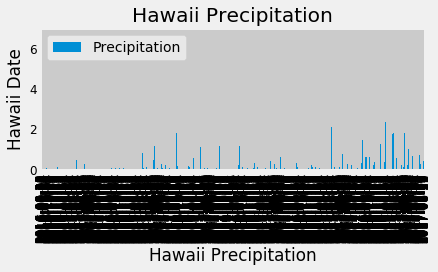

In [129]:

df_measurements_dt_prcp.plot.bar()
ax = df_measurements_dt_prcp['Precipitation'].plot(kind='bar', title ="Hawaii Precipitation", legend=False, fontsize=12)
plt.tight_layout()
plt.xlabel("Hawaii Precipitation")
plt.ylabel("Hawaii Date")

plt.show()